## Explaination of the RLC Ordinary Differential Equation

### Define and Solve the Resistor Inductor and Capacitive (RLC) Ordinary Differential Equation (ODE)

Use Kirchhoff's Voltage Law (KVL) around the loop to the sum the voltage drops across each component:

$ V(t) = V_{R} + V_{L} + V_{C} $


In this equation we differentiate each term with respect to time and get in terms of current to get the following equation: 

$ \frac{d^2I(t)}{dt^2} + R\frac{dI(t)}{dt} + \frac{1}{C} I(t) = \frac{dV(t)}{dt} $

Which becomes **Second Order Differential Equation**


For the sake of simplicity and demonstration our model will focus on solving the Homogeneous Linear Differential Equations with a zero driving voltage $V(t)$ (if $ V(t) = 0 $):

$L \frac{d^2 I(t)}{dt^2} + R \frac{dI(t)}{dt} + \frac{1}{C} I(t) = 0$

The solution to this second-order ODE depends on the roots of the characteristic equation:

$s^2 + 2\alpha s + \omega_0^2 = 0$

The roots of this equation are:

$s = -\alpha \pm \sqrt{\alpha^2 - \omega_0^2}$

Depending on the values of $\alpha$ and $\omega_0$, there are three solutions to the linear homogeneous equations for each cases:

1. **Overdamped** ($\alpha > \omega_0$): The roots are real and distinct, and the solution is:<br>
   $   
   i(t) = A e^{(-\alpha + \sqrt{\alpha^2 - \omega_0^2})t} + B e^{(-\alpha - \sqrt{\alpha^2 - \omega_0^2})t}
   $

2. **Critically damped** ($\alpha = \omega_0$): The roots are real and repeated, and the solution is:<br>
   $   i(t) = (A + Bt) e^{-\alpha t}
   $

3. **Underdamped** ($\alpha < \omega_0$): The roots are complex, and the solution takes an oscillatory form:<br>
   $   i(t) = e^{-\alpha t} (A \cos(\omega_d t) + B \sin(\omega_d t))
   $
   <br> where $\omega_d = \sqrt{\omega_0^2 - \alpha^2}$ is the damped natural frequency.

# Part 1 : MLP Neural Network using Tensorflow with Keras framework

### Import Tools

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2024-11-20 07:52:57.832726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 07:52:58.092451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732107178.184400     774 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732107178.211524     774 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 07:52:58.456395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Define the RLC ODE

In [2]:
# Define the RLC ODE 
def rlc_ode(t, y, alpha, omega_0):
    i, di_dt = y
    d2i_dt2 = -2 * alpha * di_dt - omega_0**2 * i
    return [di_dt, d2i_dt2]

## Characteristics of the ODE 
### Order:
- It's a second-order ODE because the highest derivative is $ \frac{d^2 i}{dt^2} $. 

### Linear:
- The equation is linear because $ i $, $ \frac{di}{dt} $, and $ \frac{d^2 i}{dt^2} $ appear only to the first power and are not multiplied or divided by each other.

### Homogeneous:
- It is homogeneous because the right-hand side is zero ($ f(t) = 0 $).

### Damped Oscillator:
- The term $ -2\alpha \frac{di}{dt} $ introduces damping, which affects the oscillatory behavior of the circuit.



#  Generate Training Data Function

In [3]:
def generate_data(num_samples):
    t_span = (0, 10)                            # this defines the time intervaal the system
    t_eval = np.linspace(*t_span, 100)          # create an array of 100 evenly spaced values between 0 and 10
    initial_conditions = [1.0, 0.0]             # [state variable 1, state variable 2] --> state variable 1 = charge on the cap state variable 2 = curent through the inductor
    
    X_data = []                                 # Store x data points --> key features including RLC and time points
    y_data = []                                 # Store y data points --> System Response (First State Variable i.e. current) 
    
    # Initialize counters for each type of system
    overdamped_count = 0
    underdamped_count = 0
    critically_damped_count = 0
    
    samples_per_type = num_samples // 3
    
    # Generate overdamped samples
    for _ in range(samples_per_type):
        R = np.random.uniform(1.5, 2.0)        # Higher R to ensure overdamped condition
        L = np.random.uniform(0.5, 1.0)
        C = np.random.uniform(0.5, 1.0)
        alpha = R / (2 * L)
        omega_0 = 1 / np.sqrt(L * C)
        
        if alpha > omega_0:                     # Ensure overdamped condition
        #-----------------------------------------------------------------------------------------------------------
        # Solve the ODE defined by 'rlc_ode' 
        #-----------------------------------------------------------------------------------------------------------
            solution = solve_ivp(rlc_ode, t_span, initial_conditions, t_eval=t_eval, args=(alpha, omega_0))
            X_data.append(np.hstack(([R, L, C], t_eval)))
            y_data.append(solution.y[0])
            overdamped_count += 1              # Increment overdamped counter

    # Generate underdamped samples
    for _ in range(samples_per_type):
        R = np.random.uniform(0.5, 1.0)        # Lower R to ensure underdamped condition
        L = np.random.uniform(1.0, 2.0)
        C = np.random.uniform(1.0, 2.0)
        alpha = R / (2 * L)
        omega_0 = 1 / np.sqrt(L * C)
        
        if alpha < omega_0:                     # Ensure underdamped condition
        #-----------------------------------------------------------------------------------------------------------
        # Solve the ODE
        #-----------------------------------------------------------------------------------------------------------
            solution = solve_ivp(rlc_ode, t_span, initial_conditions, t_eval=t_eval, args=(alpha, omega_0))
            X_data.append(np.hstack(([R, L, C], t_eval)))
            y_data.append(solution.y[0])
            underdamped_count += 1              # Increment underdamped counter

    # Generate critically damped samples
    for _ in range(samples_per_type):
        R = np.random.uniform(1.0, 1.5)
        L = np.random.uniform(1.0, 2.0)
        C = np.random.uniform(1.0, 2.0)
        alpha = R / (2 * L)
        omega_0 = 1 / np.sqrt(L * C)
        
        # Slightly adjust R to achieve near-critical damping if necessary
        while abs(alpha - omega_0) > 0.05:
            R = L * (2 * omega_0)  # Adjust R for critical damping
            alpha = R / (2 * L)
        #-----------------------------------------------------------------------------------------------------------
        # Solve the ODE
        #-----------------------------------------------------------------------------------------------------------
        solution = solve_ivp(rlc_ode, t_span, initial_conditions, t_eval=t_eval, args=(alpha, omega_0))
        X_data.append(np.hstack(([R, L, C], t_eval)))
        y_data.append(solution.y[0])
        critically_damped_count += 1            # Increment critically damped counter

    # Print out the tally of each type
    print("Overdamped samples:", overdamped_count)
    print("Underdamped samples:", underdamped_count)
    print("Critically damped samples:", critically_damped_count)

    return np.array(X_data), np.array(y_data)


### Use the fuction `generate_data` that we just defined

In [4]:
X_train, y_train = generate_data(num_samples=10000)

Overdamped samples: 735
Underdamped samples: 3333
Critically damped samples: 3333


# Define Neural Network

In [5]:
# Define the Neural Network Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='linear')          # Output length matches the number of time points
])

model.summary()

/home/rbrin/miniconda3/envs/tf-gpu2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732107186.578128     774 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,724 (166.89 KB)

 Trainable params: 42,724 (166.89 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Neural Network
Here we can also modify the hyperparameters as needed

In [6]:
model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500


I0000 00:00:1732107187.818333     864 service.cc:148] XLA service 0x7f76e001c720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732107187.818686     864 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-11-20 07:53:07.845272: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732107187.916265     864 cuda_dnn.cc:529] Loaded cuDNN version 90500
2024-11-20 07:53:09.035473: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_322', 68 bytes spill stores, 72 bytes spill loads



150/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1152 - loss: 0.4916

I0000 00:00:1732107189.748970     864 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1500 - loss: 0.4215 - val_accuracy: 1.0000 - val_loss: 0.0235
Epoch 2/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 3/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3931 - loss: 0.0093 - val_accuracy: 0.4429 - val_loss: 0.0073
Epoch 4/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3639 - loss: 0.0057 - val_accuracy: 0.3626 - val_loss: 0.0018
Epoch 5/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4387 - loss: 0.0042 - val_accuracy: 0.1654 - val_loss: 0.0017
Epoch 6/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4562 - loss: 0.0037 - val_accuracy: 6.7522e-04 - val_loss: 0.0021
Epoch 7/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5155 - loss: 0.0035 - val_accuracy: 0.0831 - val_loss: 0.0028
Epoch 8/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5388 - loss: 0.0033 - val_accuracy: 1.

# Save the Model

In [7]:
import os

# Ensure the directory exists
save_dir = 'C:/Users/jeremy/OneDrive/Kennesaw State University/Graduate School/Fall 2024/EE 6770 - Neural Networks/My_Models'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model
model.save(os.path.join(save_dir, 'My_Nerual_ODE.h5'))

# Plot the Results

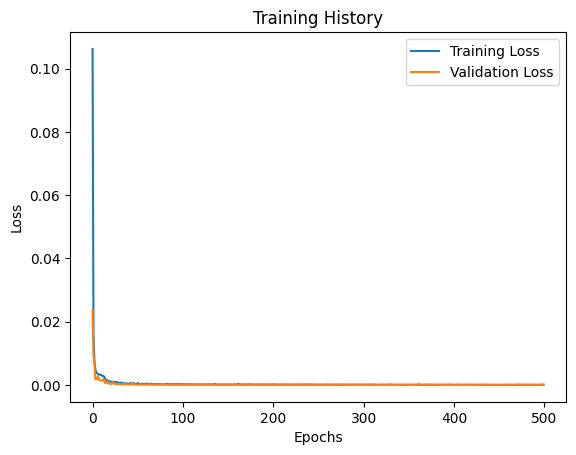

In [8]:
# Plot training history

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.show()


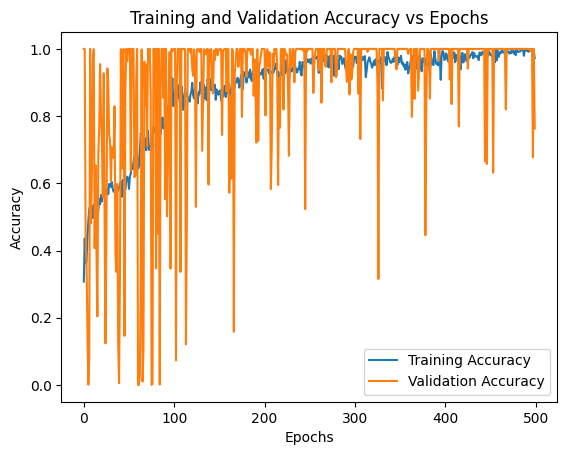

In [9]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs Epochs')
plt.show()

# Test the Trained Model on Each Damping Case

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


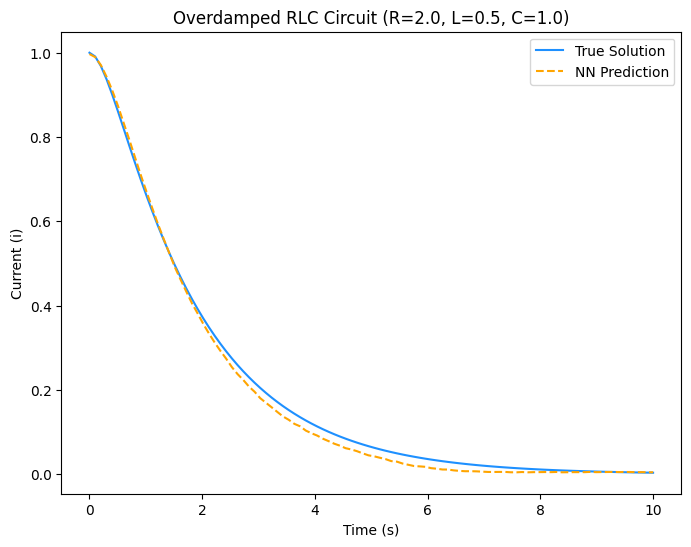

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


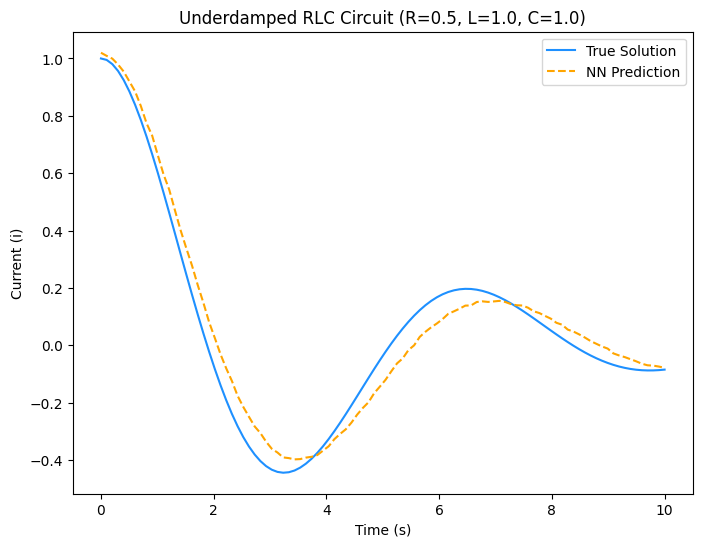

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


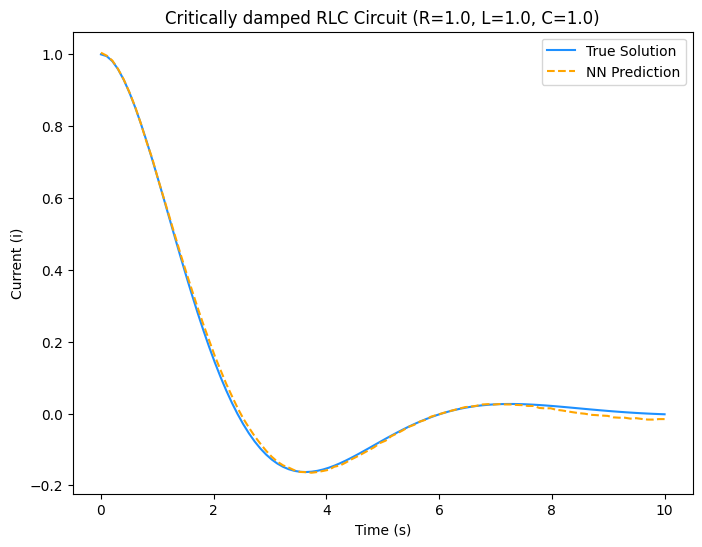

In [10]:
# Generate test time points
t_test = np.linspace(0, 10, 100)

# Define R, L, C values for each damping type
test_circuits = {
    'Overdamped': {'R': 2.0, 'L': 0.5, 'C': 1.0},
    'Underdamped': {'R': 0.5, 'L': 1.0, 'C': 1.0},
    'Critically damped': {'R': 1.0, 'L': 1.0, 'C': 1.0},
}

# Loop through each circuit type and create individual plots
for damping_type, params in test_circuits.items():
    R_test = params['R']
    L_test = params['L']
    C_test = params['C']
    
    # Calculate alpha and omega_0 for the test case
    alpha_test = R_test / (2 * L_test)
    omega_0_test = 1 / np.sqrt(L_test * C_test)
    
    # Prepare input features for the model (include R, L, C, and time points)
    X_test = np.hstack(([R_test, L_test, C_test], t_test))
    
    # Predict the current using the trained NN model
    y_pred = model.predict(X_test.reshape(1, -1)).flatten()
    
    # Solve the ODE directly to get the true current (analytical solution)
    solution_test = solve_ivp(rlc_ode, (0, 10), [1.0, 0.0], t_eval=t_test, args=(alpha_test, omega_0_test))
    # i(t) value
    y_true = solution_test.y[0]
    
    
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))
    plt.plot(t_test, y_true, label="True Solution", color="dodgerblue")
    plt.plot(t_test, y_pred, label="NN Prediction", linestyle="--", color="orange")
    plt.title(f"{damping_type} RLC Circuit (R={R_test}, L={L_test}, C={C_test})")
    plt.xlabel("Time (s)")
    plt.ylabel("Current (i)")
    plt.legend()
    plt.show()


# Test Model Against Test Data points

In [11]:
#Create Testing points with our data generator function

X_test1, y_test1 = generate_data(num_samples = 2000)

# Evaluate the model on the test set

loss, accuracy = model.evaluate(X_test1, y_test1, verbose=1)

# Print the loss and accuracy
print(f"Final test loss: {loss:.4f}")
print(f"Final test accuracy: {accuracy * 100:.2f}%")


Overdamped samples: 136
Underdamped samples: 666
Critically damped samples: 666
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9652 - loss: 5.0000e-05
Final test loss: 0.0000
Final test accuracy: 89.24%


# Print the Results of the Loss and Accuracy of the model

In [12]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.spatial.distance import cdist

for damping_type, params in test_circuits.items():
    R_test = params['R']
    L_test = params['L']
    C_test = params['C']

    alpha_test = R_test / (2 * L_test)
    omega_0_test = 1 / np.sqrt(L_test * C_test)

    X_test = np.hstack(([R_test, L_test, C_test], t_test))
    y_pred = model.predict(X_test.reshape(1, -1)).flatten()

    solution_test = solve_ivp(rlc_ode, (0, 10), [1.0, 0.0], t_eval=t_test, args=(alpha_test, omega_0_test))
    y_true = solution_test.y[0]

    # Ensure both arrays are 1-D
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()

    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Compute the DTW-like distance using cdist as a fallback
    # dtw_distance = np.sum(cdist(y_true.reshape(-1, 1), y_pred.reshape(-1, 1), metric='euclidean'))
    print(f"Performance for {damping_type}:")
    print(f"  Mean Absolute Error (MAE): {mae * 100:.2f}%")
    print(f"  Mean Squared Error (MSE): {mse * 100:.2f}%")
    print(f"  R-squared: {r2 * 100:.2f}%\n") #100% is good here
    # print(f"  DTW-like Distance using cdist: {dtw_distance * 100:.2f}%\n") #lower values indicating better alignment.




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Performance for Overdamped:
  Mean Absolute Error (MAE): 1.31%
  Mean Squared Error (MSE): 0.02%
  R-squared: 99.68%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Performance for Underdamped:
  Mean Absolute Error (MAE): 5.69%
  Mean Squared Error (MSE): 0.43%
  R-squared: 96.58%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Performance for Critically damped:
  Mean Absolute Error (MAE): 0.70%
  Mean Squared Error (MSE): 0.01%
  R-squared: 99.91%



### Explanation of the Code

1. **Data Generation**:
   - `generate_data` creates synthetic training samples. We randomly vary $R$, $L$, and $C$ and use `solve_ivp` to compute the current over time.
   - Each feature vector includes the parameters $R$, $L$, $C$, and the time points. Each label is the corresponding current values over time.

2. **Model Definition**:
   - A simple feedforward neural network (Multi-Layer Perceptron) is used. The input layer takes in the RLC parameters and time points, while the output layer provides the current at each time point.

3. **Training**:
   - We train the model using mean squared error (MSE) as the loss function. The `history` variable captures training progress, which we plot to ensure the model is learning.

4. **Testing**:
   - We evaluate the neural network on a new RLC configuration by comparing its prediction with the analytical solution (computed by `solve_ivp`).

### Notes
- This model learns to approximate the general response of an RLC circuit across different parameter values without directly solving the ODE at each time step.


---------------------------------------------------------------------------------------------------------------------------------------------

# Part 2: Physics Informed Neural Networks (PINN)
Physics-Informed Neural Networks (PINNs) are a sophisticated blend of machine learning and classical physics. They incorporate known physical laws, typically represented by differential equations, directly into the neural network's learning process. This integration helps ensure that the model's predictions are not only driven by data but are also consistent with established physical principles.

### Why Use PINNs?

1. **Improved Accuracy**: By embedding physical laws into the network, PINNs can improve the accuracy of predictions, especially in scenarios where data is sparse or noisy.

2. **Generalization**: PINNs often generalize better than purely data-driven models because they leverage fundamental physical laws that are universally applicable.

3. **Solving Complex Problems**: PINNs are particularly useful for solving forward and inverse problems involving complex physical systems, such as fluid dynamics, material science, and quantum mechanics.

### How Do PINNs Work?

1. **Formulating the Problem:** The first step is to define the physical system and the differential equations that describe it. In this case since we are looking at RLC Circuits, we use: $$ \frac{d^2i}{dt^2} + 2\alpha \frac{di}{dt} + \omega_0^2 i = 0 $$

2. **Neural Network Architecture**: A neural network is designed to approximate the solution of the differential equations. It takes as its input time, and produces an output I for current.

3. **Loss Function**: The loss function in a PINN is augmented to include terms that penalize deviations from the physical laws. This typically involves computing residuals of the differential equations using automatic differentiation. 

4. **Training**: The loss function is able to be minimized by knowing what the output of the equation should be. Because our differential equation is set to $0$, if the output of the neural network does not mach this, a loss is generated. 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

sample_points = 1000

## 1. Functions
### Underdampend Solution
As previously stated, the equation for an **underdampend** ($\alpha < \omega_0$) circuit is $ i(t) = e^{-\alpha t} (A \cos(\omega_d t) + B \sin(\omega_d t)) $, where **A** and **B** are our boundary conditions that must be calculated given initial conditions $ i(0) $ and $ di(0)/dt $. <br> With this equation we are able to get the exact current for all points in time.

In [42]:
def rlc_under(t):
    alpha = R_test / (2 * L_test)
    omega_0 = 1 / np.sqrt(L_test * C_test)
    zeta = alpha / omega_0
    omega_d = omega_0 * np.sqrt(1 - zeta ** 2)
    A = I0
    B = dI0_dt + (A * alpha) / omega_d
    
    I = (A  * np.cos(omega_d * t) + B * np.sin(omega_d * t)) * np.exp(-alpha * t)
    
    return I

### Voltage
We can use this function to drive a voltage onto the circuit. Currently, it's set to 0, but could be set to a DC bias or an AC signal.

In [43]:
# Define the input voltage as a function of time
def voltage(t):
    return 0


### Neural Network
We use Tensorflow's Keras to create out network for training. It includes two hidden layers with a tanh activation and a linear output. This output is what we will use as our prediction for current.

In [44]:
# Define the neural network model for current I(t)
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(32, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1, activation='linear')

    def call(self, t):
        x = self.dense1(t)
        x = self.dense2(x)
        return self.dense3(x)

### PINN (Physics Informed Neural Network) Loss
#### Gradient Tape
Gradient tapes are what Tensorflow uses to implement automatic differentiation. To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients. The gradients generated also use the adjoint sensitivity method which keeps the memory use at $O(1)$.

These gradients are what allows us to create derivatives for the system at each time point. As you can see in the function, $I$ is first calculated by passing $t$ through the model. A gradient is then calculated with these two pieces of information, and this is what creates our first order derivative $dI/dt$. The derivative can then be passed to another gradient to create the second order derivative $d^2I/dt^2$. 

#### Loss Function
After the $I$, $dI/dt$, and $d^2I/dt^2$ are all calculated for every given point in time, they can be entered into our differential equation  $L\frac{d^2I(t)}{dt^2} + R\frac{dI(t)}{dt} + \frac{1}{C} I(t) = \frac{dV(t)}{dt} $
 and an output is calculated. <br>We use this output to calculate our Loss as captured by *ode_loss*. In this case we use the Mean Squared Error method to determine what the loss is over all points in time. 
 <br> Because this is also an initial value problem we also need to capture the loss of the output at $t(0)$. This is captured by *ic_loss* which grabs the first term of the $I$ tensor, and compares it to our given initial value for $I$.

In [45]:
#Define Variables for Circuit
R_test, L_test, C_test = 0.5, 1.0, 1.0  # Test RLC values
I0, dI0_dt = 1.0, 0.0
alpha_test = R_test / (2 * L_test)
omega_0_test = 1 / np.sqrt(L_test * C_test)

# Define the custom loss function for the PINN
def pinn_loss(model, t, V):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        I = model(t)
        dI_dt = tape.gradient(I, t)
        d2I_dt2 = tape.gradient(dI_dt, t)

    ode_loss = L_test * d2I_dt2 + R_test * dI_dt + (1 / C_test) * I + V(t)
    ic_loss = I[0] - I0
    return tf.reduce_mean(tf.square(ode_loss)) + tf.reduce_mean(tf.square(ic_loss)) 

### Training
We apply the Gradient Tape to gather all the losses over the entire time series used. A final gradient is created out of the losses and the parameters of our neural network, and then finally those parameters are passed to the optomizer to adjust the weights and bias'.

In [46]:
# Define the training step
@tf.function
def train_step(model, t, V, optimizer):
    with tf.GradientTape() as tape:
        loss = pinn_loss(model, t, V)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss 

### Model Accuracy  **R-squared (**$R^2$**)**:

In order to capture the accuracy of the model, we employ the $R^2$ method as it gives the proportion of variance of the dependent variable as predicted by the independent variable. This lets us know how tightly our predicted values adhere to the actual values. The closer $R^2$ is to 1, the more accurate the prediction is. Defined by: $$ R^2 = 1 - \frac{\sum_i (y_i - f_i)^2}{\sum_i (y_i - \overline{y})^2} $$

In [47]:
def pinn_accuracy(y_t, y_p):
    y_p = y_p.numpy()
    return r2_score(y_t, y_p)

## 2. Generate Data
### Time data
We create a time series from 0 to 10 seconds with 1000 intervals between the two endpoints. For our training data, we take $80\%$ of the series at random that will be passed to our neural network. The other $20\%$ will be passed to the neural network after the training process is completed. If the neural network does a poor job of generalizing, it will be unable to accurately predict what the current should be at these time-points and thus the $R^2$ value will drop.

In [48]:
# Generate training data
t_values = np.linspace(0, 10, sample_points).astype(np.float32).reshape(-1, 1)
t_train, _ = train_test_split(t_values, train_size=0.8, random_state=42)

### PINN Model
Here we call the model and choose the Adam optimization at a learning rate of $0.05$

In [49]:
# Instantiate the model and optimizer
pinn_model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

### Comparison Data
We use both the exact solution of the differential equation and the Runge-Kutta $4^{th}$ order solver to compare our results against. The Runge-Kutta method is a very common and accurate means of solving a differential equation. Its limitation is that it can only be solved sequentially. The whole goal of this exercise is to be able to compete with this algorithm and do so a greater speeds over larger data sets. 

In [50]:
# Exact Solutions across the time series
start_exact = time.time()
I_exact = rlc_under(t_values)
end_exact = time.time()
exact_benchmark = end_exact - start_exact

# Solve the ODE directly to compare
start_rk45 = time.time()
solution_test = solve_ivp(rlc_ode, (0, 10), [1.0, 0.0], t_eval=np.linspace(0,10,sample_points), args=(alpha_test, omega_0_test), method='RK45')
end_rk45 = time.time()

rk45_benchmark = end_rk45 - start_rk45

I_rk45 = solution_test.y[0]


### Train the Model 

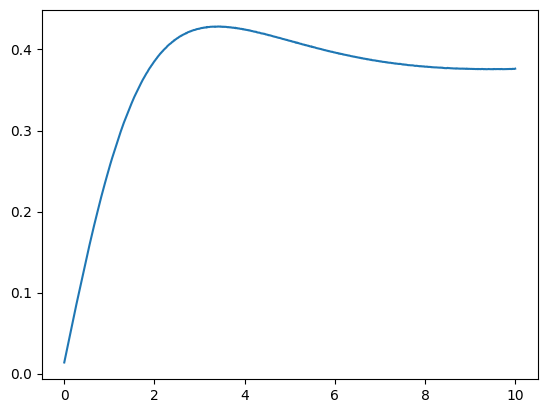

Epoch 0, Loss: 1.0363401174545288
Epoch 100, Loss: 0.03551335632801056
Epoch 200, Loss: 0.019420690834522247
Epoch 300, Loss: 0.01774240843951702
Epoch 400, Loss: 0.016434775665402412
Epoch 500, Loss: 0.015326648950576782
Epoch 600, Loss: 0.014341653324663639
Epoch 700, Loss: 0.013419500552117825
Epoch 800, Loss: 0.012470606714487076
Epoch 900, Loss: 0.011386485770344734
Epoch 1000, Loss: 0.00993460975587368
Epoch 1100, Loss: 0.007771692238748074
Epoch 1200, Loss: 0.004869663622230291
Epoch 1300, Loss: 0.0027190588880330324
Epoch 1400, Loss: 0.002050474053248763
Epoch 1500, Loss: 0.0017383850645273924
Epoch 1600, Loss: 0.0014568978222087026
Epoch 1700, Loss: 0.001233199262060225
Epoch 1800, Loss: 0.001072792219929397
Epoch 1900, Loss: 0.0009666511323302984


In [51]:
# Train the model
loss_data = []
accuracy_data = []
epochs = 2000
for epoch in range(epochs):
    loss = train_step(pinn_model, t_train, voltage, optimizer)
    I_pred = pinn_model(t_values)
    accuracy_data.append(pinn_accuracy(I_exact, I_pred))
    loss_data.append(loss.numpy())
    if epoch == 0:
        plt.plot(t_values, I_pred)
        plt.show()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

## 3. Results

In [52]:
# Predict the current I(t) using the trained model
start_pinn = time.time()
I_pred = pinn_model(t_values)
stop_pinn = time.time()

pinn_benchmark = stop_pinn - start_pinn

### Benchmarks
As we can see to inference our neural network is faster than the Runge-Kutta method.

In [53]:
print(f"Pinn inference time: {pinn_benchmark}")
print(f"Exact solution time: {exact_benchmark}")
print(f"Runge-Kutta time:    {rk45_benchmark}")

Pinn inference time: 0.0036897659301757812
Exact solution time: 0.0005838871002197266
Runge-Kutta time:    0.001874685287475586


### Final Output
We can see the comparison of the three models at work. They all mostly agree with each other over the majority of the line, however, our model is slightly less accurate than the Runge-Kutta algorithm. 

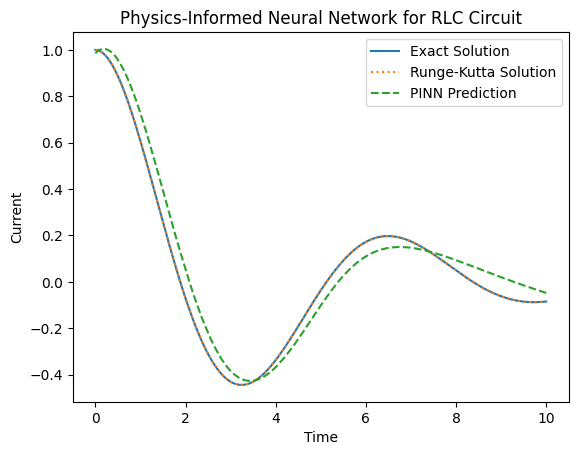

In [54]:
# Plot the results
import matplotlib.pyplot as plt


plt.plot(t_values, I_exact, label='Exact Solution')
plt.plot(t_values, I_rk45, label='Runge-Kutta Solution', linestyle= 'dotted')
plt.plot(t_values, I_pred, label='PINN Prediction', linestyle= 'dashed')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Physics-Informed Neural Network for RLC Circuit')
plt.legend()
plt.show()

### Final Loss
Drop off very quick

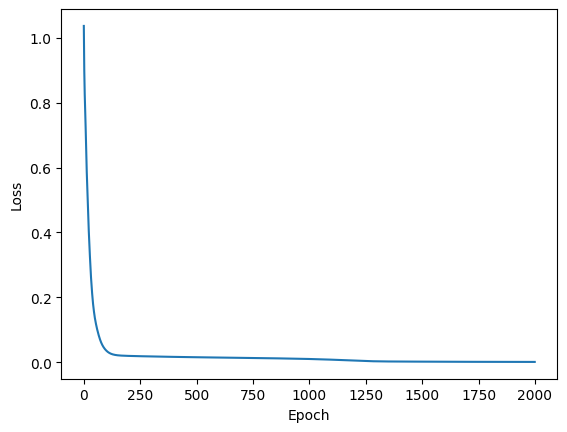

In [55]:
plt.plot(loss_data, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Final Accuracy

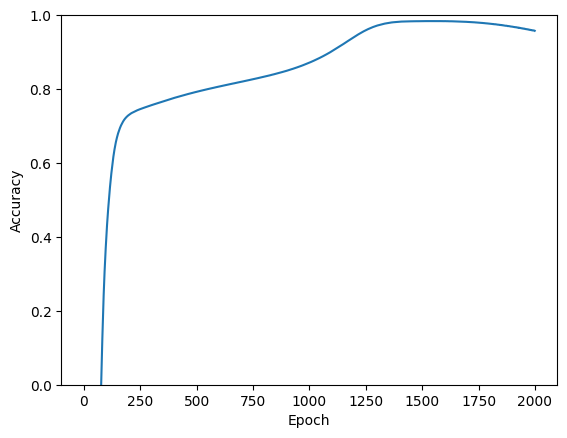

In [56]:
plt.plot(accuracy_data, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

## 4. Conclusion
The findings of our Physics Informed Neural Network are very interesting. We were able to create an accurate solution of the differential equation just by passing values of time into the network. And based off the auto differentiation properties of machine learning we were able to adjust the parameters of the model with no comparison at all to either the actual solution or a solution algorithm. There is a tradeoff, however, the model is less accurate than either the solution or the solver algorithm. But where it does show promise is that after the model is trained, inferencing can be faster than using the RK4 and at the very least similar in speed. There is also promise for differential equations that have either very difficult solutions or do not have one at all. With this PINN method, you are able to generate a solution that may be accurate enough without the need of a solution. At any rate, this is a very interesting way of using neural networks.

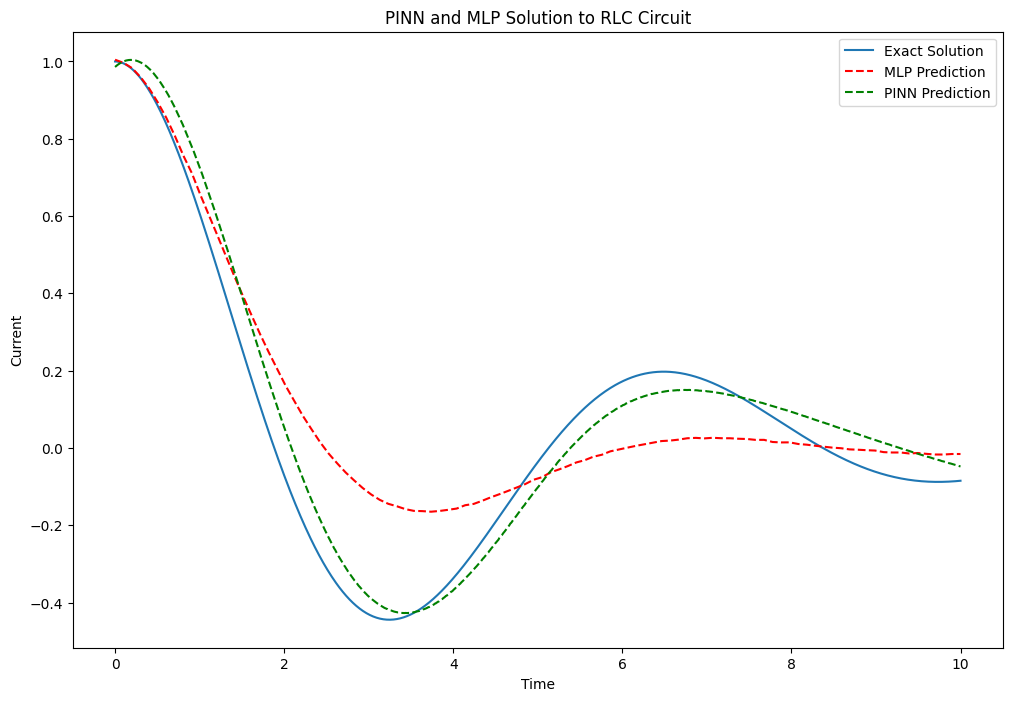

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(t_values, I_exact, label='Exact Solution')
plt.plot(t_test, y_pred, label="MLP Prediction", linestyle="--", color="red")
plt.plot(t_values, I_pred, label='PINN Prediction', linestyle= 'dashed' , color="green")
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('PINN and MLP Solution to RLC Circuit')
plt.legend()
plt.show()